In [3]:
import numpy as np
import os
import math 
import matplotlib.pyplot as plt

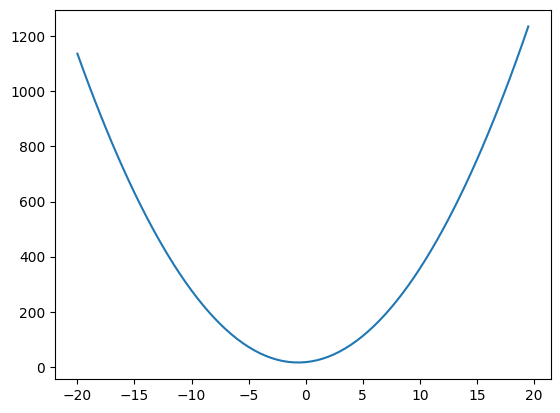

In [8]:
def func(x):
    """ Generates a polynomial on x. """
    return 3*(x**2) + 4*x + 17


x = np.arange(-20, 20, 0.5)
y = func(x)

plt.plot(x, y)


array([4, 5, 7])